#  Regresión lineal 

Una compañia busca expandirse a una nueva ciudad. La CEO de la empresa esta decidiendo cual ciudad es la mejor en cuanto a beneficios por el costo. 

Para ayudarla, nosotros trabajaremos con Numpy utilizando un pequeño código que implemente la técnica de regresión lineal para poder observar como seria el beneficio de la empresa al ir a una ciudad predeterminada.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd  
import seaborn as sns 
from jupyterthemes import jtplot
jtplot.style(theme='onedork')
jtplot.style(ticks=True, grid=True, figsize=(15, 8))

Podemos comenzar a trabajar con los datos. Primero, comenzaremos a leer los datos de la empresa.

In [2]:
data=pd.read_csv('bike_sharing_data.txt')
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   Profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


Observemos la información. Esto nos dara una idea más clara de como trabajamos con el sistema. Cabe recalcar que ambas expresiones (tanto **Profit** como **Population** se tratan en miles de unidades).

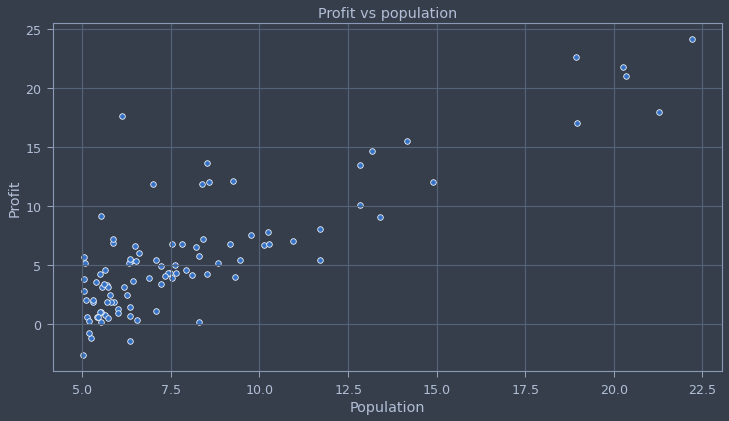

In [4]:
ax=sns.scatterplot(x='Population',y='Profit',data=data)
ax.set_title('Profit vs population');

## La función de costo.

El objetivo de realizar esta regresión lineal es poder minimizar nuestra función de costo. La función de costos para nosotros es:

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)} )^2$$

donde $h_{\theta}(x)$ es nuestra hipotesis. Esta dada por el siguiente modelo lineal:

$$h_{\theta}(x) = \theta^Tx = \theta_0 + \theta_1x_1$$

Podemos comenzar a trabajar con estos datos. Primeramente, es bueno computarla y obtener el valor de la función de costo. Para esto creamos una función y creamos los valores de _input_.

In [5]:
def cost_func(x,y,theta):
    m = len(y)
    y_pred = x.dot(theta)
    error = (y_pred-y)**2
    
    return 1/(2*m)*np.sum(error)

m = data.Population.values.size
x = np.append(np.ones((m,1)), data.Population.values.reshape(m,1), axis=1)
y = data.Profit.values.reshape(m,1)
theta = np.zeros((2,1))

print('El valor de la función de costo es:',cost_func(x,y,theta))

El valor de la función de costo es: 32.072733877455676


## El gradiente descendiente.

Ahora, minimizaremos nuestra función de costo $J(\theta)$ actualizando la ecuación con este valor y repitiendo el proceso $n$ veces hasta que este valor converga a su minimo. Esto se logra con:
        
\begin{equation}
\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}
\end{equation}

In [6]:
def gradient_descent(x,y,theta,alpha,iterations):
    m = len(y)
    costs=[]
    for i in range(iterations):
        y_pred=x.dot(theta)
        error = np.dot(x.transpose(), (y_pred-y))
        theta = theta-alpha/m*error
        costs.append(cost_func(x,y,theta))
    return theta,costs

theta,cost=gradient_descent(x,y,theta,alpha=0.01,iterations=1000)

print('La hipotesis ahora es h(x)={}+{}x1'.format(str(round(theta[0,0],2)),
                                                  str(round(theta[1,0],2))))

La hipotesis ahora es h(x)=-3.24+1.13x1


## Observar el resultado de nuestra función de costo  $J(\theta)$.

Ahora, despues de generar anteriormente nuestra hipotesis $h_0(x)$, podemos ahora si observar la minimización de nuestra función de costo y ver hacia donde converge. 

Por esta parte, solo nos interesa ver la función de costo y más adelante ya trabajaremos con su convergencia.

In [7]:
from mpl_toolkits.mplot3d import Axes3D #Para generar una gráfica en 3d.

theta_0=np.linspace(-10,10,100)
theta_1=np.linspace(-1,4,100)

cost_values = np.zeros((len(theta_0), len(theta_1)))

for i in range(len(theta_0)):
    for j in range(len(theta_1)):
        t = np.array([theta_0[i],theta_1[j]])
        cost_values[i,j]=cost_func(x, y, t)

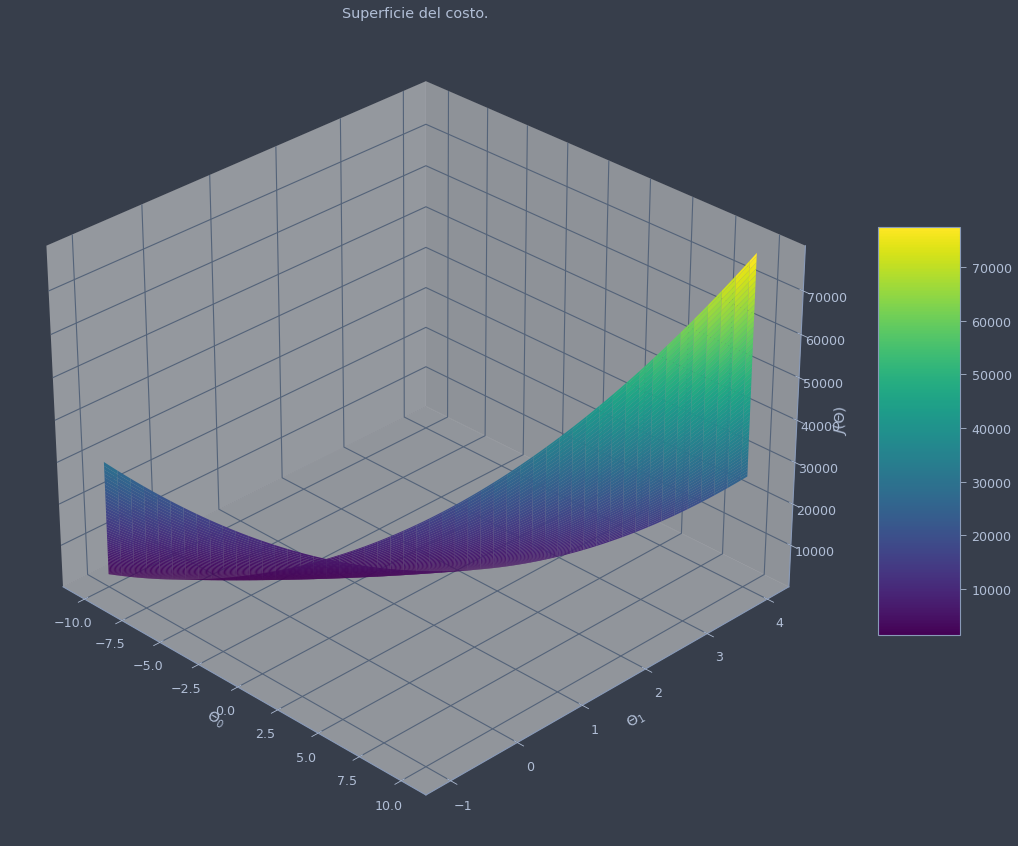

In [8]:
fig = plt.figure(figsize=(20,15))
ax = fig.gca(projection = '3d')

surf = ax.plot_surface(theta_0,theta_1, cost_values, cmap= 'viridis')
fig.colorbar(surf,shrink=0.5,aspect=5)

plt.xlabel("$\Theta_0$")
plt.ylabel("$\Theta_1$")
ax.set_zlabel("$J(\Theta)$")
ax.set_title("Superficie del costo.")
ax.view_init(30,315)

plt.show()

## La convergencia del sistema.

Ahora, podemos demostrar como fue que nuestra función de costo $J(\theta)$ converge a cierto valor una vez se aplican un número $n$ de iteraciones. Esto nos permite observar no solamente a cual valor converge el sistema, si no como lo hace.

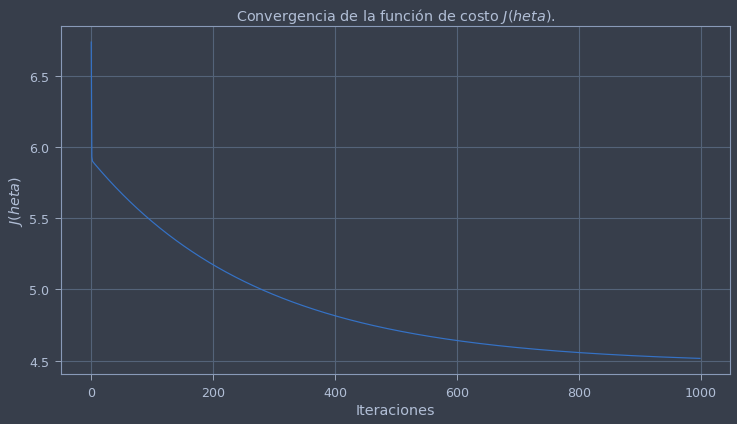

In [9]:
def graph(costs):
    fig=plt.figure()
    plt.title('Convergencia de la función de costo $J(\theta)$.')
    plt.xlabel('Iteraciones')
    plt.ylabel('$J(\theta)$')
    plt.plot(cost)
graf=graph(cost)

## Comparación de los datos con el ajuste de la regresión lineal.

Ahora, utilizando los datos de nuestro archivo, mostraremos el ajuste dado de la regresión lineal para observar como se ve el tratamiento de los datos. Recordemos nuevamente, que cada unidad es igual a mil.

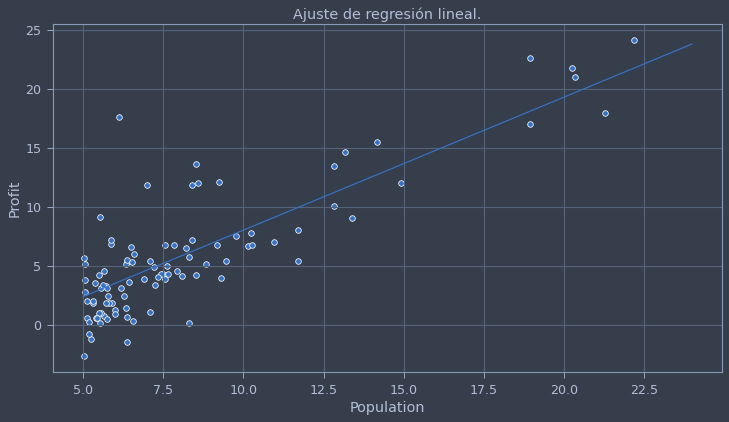

In [10]:
def graph_linear(data, theta):
    sns.scatterplot(x = "Population", y= "Profit", data = data)

    x_value=[x for x in range(5, 25)] #Nuestros valores tienen estos limites para x.
    y_value=[(x * theta[1] + theta[0]) for x in x_value]
    sns.lineplot(x_value,y_value)
    plt.xlabel("Population")
    plt.ylabel("Profit")
    plt.title("Ajuste de regresión lineal.");

theta = np.squeeze(theta)
graph_linear(data,theta)

## Inferencia usando los valores optimizados de $\theta$.

\begin{equation}
h_\theta(x) = \theta^Tx
\end{equation}

Ahora, le daremos un estudio lógico al sistema. En este caso, eso se logra con la inferencia de nuestros valores optimizados. Esto nos permitira predecir de forma más acertada los resultados. Por lo que, podemos crear una función que nos diga el beneficio predecido para cierta población. 

Utilizamos dos ejemplos para demostrar como trabaja el sistema.

In [11]:
def predict(x, theta):
    y_pred = np.dot(theta.transpose(), x)
    return y_pred

y_pred_1 = predict(np.array([1, 4]),theta) * 10000
y_pred_2 = predict(np.array([1, 8.3]), theta) * 10000
print('Para una población con 40,000 personas, nuestro modelo precide un beneficio de $'
      + str(round(y_pred_1, 0)))
print('\n')
print('Para una población con 83,000 personas, nuestro modelo precide un beneficio de $'
      + str(round(y_pred_2, 0)))

Para una población con 40,000 personas, nuestro modelo precide un beneficio de $12678.0


Para una población con 83,000 personas, nuestro modelo precide un beneficio de $61151.0
